# Finite Difference Time Domain (FDTD) 1D Simulation

An electromagnetic simulation, with initial code and ideas borrowed from
 * Understanding the Finite-Difference Time-Domain Method, John B. Schneider, http://www.eecs.wsu.edu/~schneidj/ufdtd, 2010.
 
The impedance of free space (or vacuum) is 377.0.
## 1. Modify the code in the notebook and simulate a PEC slab of width w = 25mm. You may place it starting at 150 mm

### (1) Firstly, measure the electric field with respect to time at the location  of sensor.


In [1]:
# Initialization
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# set parametres, including characteristic impedance, the size of space, time and source.
imp0 = 377.0 # property of free space (vacuum)
SIZE = 400 # dimension of space to model
sensorLocation = 250 # location of output sensor
maxTime = 700 # simulation time

sourcePeakTime = 30 # peak of the Gaussian source
sourceSdv = 7 # standard deviation of the Gaussian source
sourceSigma = 2 * sourceSdv**2

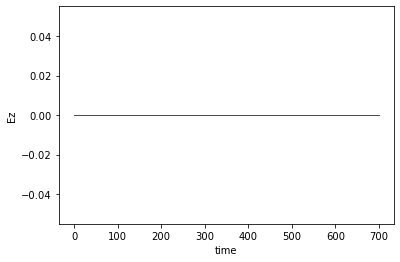

In [2]:
ez = [0.0] * SIZE
hy = [0.0] * SIZE
output = [0.0] * maxTime # the output result of the sensor with respect to time
epsR = [1.0] * SIZE # free space
# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0

    # update electric field
    for i in range(SIZE):
        if i>=150 and i<=150+25: # place PEC slab. Since there is no electric field in PEC, ez[i] is set 0.
            ez[i]=0.0
        else:
            ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
            
    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
        ez[0] = 0.0

    output[n] = ez[sensorLocation]
#done with time stepping loop
plt.plot(range(maxTime), output, color='green', linewidth=1)
plt.xlabel('time')
plt.ylabel('Ez')
plt.show()

As shown in the picture, we can see that there is no signal at the location of output sensor. It's  because the sensor is put at the right of the PEC slab and the electric field can't transmit through the PEC.

### (2) Then display the electric field with respect to space at the different time by visualizing the Ez field over the simulation.

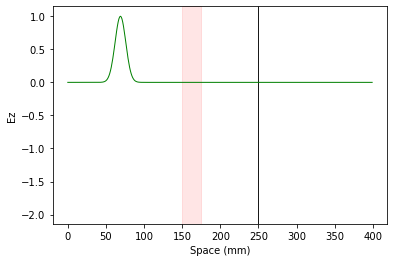

In [3]:
ims = []  

# set up a plot
fig, ax = plt.subplots()
ax.axvspan(150, 150+25, alpha=0.1, color='red') # PEC slab
ax.axvspan(250, 250, alpha=0.9, color='black') # sensor
ax.set_xlabel('Space (mm)')
ax.set_ylabel('Ez')


ez = [0.0] * SIZE
hy = [0.0] * SIZE

# free space
epsR = [1.0] * SIZE

# do time stepping
for n in range(maxTime):

    # update magnetic field
    for i in range(SIZE-1):
        hy[i] = hy[i] + (ez[i + 1] - ez[i]) / imp0
    
    # update electric field
    for i in range(SIZE):
        if i>=150 and i<=150+25: # place PEC slab. Since there is no electric field in PEC, ez[i] is set 0.
            ez[i]=0.0
        else:
            ez[i] = ez[i] + (hy[i] - hy[i - 1]) * imp0 / epsR[i]
    # capture a snapshot of the ez field at this timestep to the animation
    ims.append((plt.plot(range(SIZE), ez, color='green', linewidth=1)))

    # hardwire a source node */
    if n < sourceSigma:
        ez[0] = math.exp(-(n - sourcePeakTime)**2 / sourceSigma)
    else:
        ez[0] = 0.0
#done with time stepping loop

#build and display the animation
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=5000, blit=True)
HTML(im_ani.to_jshtml())



It can be seen that electric field reflects from the PEC slab.